<a href="https://colab.research.google.com/github/lemwaizz/regression-summative/blob/main/Monkey_Pox__checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __MONKEYPOX PREDICTION__

## Problem Statement

As more cases of monkeypox emerge, the world becomes increasingly concerned, as they do not want a repeat of what happened not too long ago, when the infamous Covid-19 broke out and altered the world as we know it. Faced with the reality that such viral diseases can actually shut down the planet, the organization must develop ways to reduce the spread of this disease, enter the Health authorities in the United Kingdom, they have established an incident management team to coordinate the extensive contact tracing  in regards to how quickly the virus can be transferred and, worse, mutate into a more lethal variant.

On July 23, the World Health Organization declared the outbreak “a public health emergency of international concern.” Another thing you should know about monkeypox is that it is extremely unpleasant. The current strain has a 1% mortality rate, and as of this writing, there have been three deaths reported in outbreaks outside of Africa, and five deaths in African countries where the disease is endemic, since the beginning of the year.
The West African strain of the monkeypox virus is associated with milder disease and fewer deaths than the Central African strain.

Even if the chances of death are low, patients with monkeypox have reported how painful and debilitating the disease is. "People may experience flu-like symptoms at first, such as fever and headache, but as the disease progresses, you get a multi-stage rash, lesions can develop in your mouth, feet, and genital region, and these develop into pus-filled blisters."Symptoms can appear between five and 21 days after infection, though the average incubation period is 6 to 13 days. For the first few days, there are headaches, fever, muscle aches, and fatigue.

As students of the Incident Management team we have been tasked to create a model to accurately identify potential infected persons in order to make contact tracing faster and more efficient, thereby halting the spread.

## Proposed Solution

One proposed solution is to cultivate the use of data in attempting to predict whether or not a person has monkeypox in order to make contact tracing easier.




## Importing Libraries

Libraries to enhance data manipulation.

These comprises of;
   > **NumPy**
   
   NumPy is an open source project aiming to enable numerical computing with Python.
   
   > **pandas**
   
   pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
    built on top of the Python programming language.   

In [455]:
import pandas as pd
import numpy as np

Libraries for visualization;

   >**Seaborn**
    
   Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
    
   >**Matplotlib**
    
   Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [456]:
import seaborn as sns
# setting the theme
sns.set_style("darkgrid")

import matplotlib.pyplot as plt

Libraries for modelling tasks;

   >**scikit-learn**
   
   Simple and efficient tools for predictive data analysis, accessible to everybody, and reusable in various contexts built on NumPy, SciPy, and matplotlib

In [457]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, precision_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

Library for saving our final model

In [458]:
import joblib

Library for ignoring deprecation warnings

In [459]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

#### Defining relevant Functions.

## Loading Data

In [460]:
# Loading the data using pandas into mp {Monkey Pox}

# Index_col sets the index to be the patient id as there is no need to have more than one unique identifiers.

mp = pd.read_csv('DATA.csv')

# 2. DATA UNDERSTANDING

## Overview

We are using a SYNTHETIC dataset generated from a study published by the British Medical Journal. It is a description of the clinical features and novel presentations of human monkeypox during the outbreak of 2022 in central London.

The data has already been loaded in the above code cell.

In [461]:
# preview of the first 5 rows
mp.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [462]:
# Checking the summary of the data

mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [463]:
# checking for duplicates using the index as a guide as the index is the personal id
mp.duplicated().sum()

np.int64(0)

In [464]:
# viewing the column names of the dataset

mp.columns

Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [465]:
# checking the summary statistics of the data
mp.describe()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,18784,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,3,2,2,2,2,2,2,2,2,2
top,P24999,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [466]:
# shape of the data
mp.shape

(25000, 11)

In [467]:
#renaming columns
mp.rename(columns={'Systemic Illness':'Systemic_Illness',
                        'Rectal Pain':'Rectal_Pain',
                        'Sore Throat':'Sore_Throat',
                        'Penile Oedema':'Penile_Oedema',
                        'Oral Lesions':'Oral_Lesions',
                        'Solitary Lesion':'Solitary_Leision',
                        'Swollen Tonsils':'Swollen_Tonsils',
                        'HIV Infection':'HIV_Infection',
                        'Sexually Transmitted Infection':'STI',
                        'MonkeyPox':'Target'},inplace=True)

In [468]:
# Checking on the uniue value counts in Systemic Illness
mp['Systemic_Illness'].value_counts()

,count
Systemic_Illness,
Fever,6382
Swollen Lymph Nodes,6252
Muscle Aches and Pain,6150


In [469]:
# Reducing ambiguity in the systemic illness column we change none to No systemic Illness

mp['Systemic_Illness'].replace(to_replace= 'None',value= 'No_Systemic_Illness',inplace= True)

In [470]:
# confirming
mp['Systemic_Illness'].value_counts()

,count
Systemic_Illness,
Fever,6382
Swollen Lymph Nodes,6252
Muscle Aches and Pain,6150


### Dropping Patient ID

In [471]:
# dropping the patient id
mp.drop(columns=['Patient_ID'],axis = 1, inplace=True)
mp.head(3)

,Systemic_Illness,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Leision,Swollen_Tonsils,HIV_Infection,STI,Target
0,NaN,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive


### Uniformity of Column names

In [472]:
# replacing the names
mp.rename(columns={'Systemic Illness':'Systemic_Illness',
                        'Rectal Pain':'Rectal_Pain',
                        'Sore Throat':'Sore_Throat',
                        'Penile Oedema':'Penile_Oedema',
                        'Oral Lesions':'Oral_Lesions',
                        'Solitary Lesion':'Solitary_Leision',
                        'Swollen Tonsils':'Swollen_Tonsils',
                        'HIV Infection':'HIV_Infection',
                        'Sexually Transmitted Infection':'STI',
                        'MonkeyPox':'Target'},inplace=True)
mp.head(3)

,Systemic_Illness,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Leision,Swollen_Tonsils,HIV_Infection,STI,Target
0,NaN,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive


### Type casting Objects to Categorical data types

In [473]:
# For loop to get all object types in the data frame
col_obj = []
for x in list(mp.columns):
    if mp[x].dtypes == object:
        col_obj.append(x)
col_obj

['Systemic_Illness', 'Target']

In [474]:
# type_casting object to categorical

mp[col_obj] = mp[col_obj].astype('category')

# confirming
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Systemic_Illness  18784 non-null  category
 1   Rectal_Pain       25000 non-null  bool    
 2   Sore_Throat       25000 non-null  bool    
 3   Penile_Oedema     25000 non-null  bool    
 4   Oral_Lesions      25000 non-null  bool    
 5   Solitary_Leision  25000 non-null  bool    
 6   Swollen_Tonsils   25000 non-null  bool    
 7   HIV_Infection     25000 non-null  bool    
 8   STI               25000 non-null  bool    
 9   Target            25000 non-null  category
dtypes: bool(8), category(2)
memory usage: 244.5 KB


# 3. DATA PREPARATION

Now that we have finished with EDa. We should prepare the data `mp` for modeling by one hot encoding to get binary column.


In [475]:
mp.head()

,Systemic_Illness,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Leision,Swollen_Tonsils,HIV_Infection,STI,Target
0,NaN,False,True,True,True,False,True,False,False,Negative
1,Fever,True,False,True,True,False,False,True,False,Positive
2,Fever,False,True,True,False,False,False,True,False,Positive
3,NaN,True,False,False,False,True,True,True,False,Positive
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [476]:
# type casting Systemic illness by using get dummies
print(mp.columns)
df = pd.get_dummies(data= mp, columns= ['Systemic_Illness'],drop_first= False) # using the correct column name 'Systemic_Illness' was previously renamed to Systemic_Illness
# dropping every other column to isolate the systemic illness ...will concat later.
# The column name was changed in a previous cell of the notebook
# to 'Systemic_Illness'. Update this line to reflect this change.
df_Systemic = df.drop(columns=[c for c in col[1:] if c in df.columns],axis = 1) # drop only columns that exist in df
#df_Systemic = df_Systemic.drop(columns= ['Systemic Illness_No Systemic Illness'],axis = 1)
#df_Systemic

Index(['Systemic_Illness', 'Rectal_Pain', 'Sore_Throat', 'Penile_Oedema',
       'Oral_Lesions', 'Solitary_Leision', 'Swollen_Tonsils', 'HIV_Infection',
       'STI', 'Target'],
      dtype='object')


In [477]:
# drop_first is set to true to reduce on multicoliniearity
df_d = pd.get_dummies(data = mp, columns= col[1:], drop_first= True)
df_d

,Systemic_Illness,Rectal_Pain_True,Sore_Throat_True,Penile_Oedema_True,Oral_Lesions_True,Solitary_Leision_True,Swollen_Tonsils_True,HIV_Infection_True,STI_True,Target_Positive
0,NaN,False,True,True,True,False,True,False,False,False
1,Fever,True,False,True,True,False,False,True,False,True
2,Fever,False,True,True,False,False,False,True,False,True
3,NaN,True,False,False,False,True,True,True,False,True
4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
24995,NaN,True,True,False,True,True,False,False,True,True
24996,Fever,False,True,True,False,True,True,True,True,True
24997,NaN,True,True,False,False,True,True,False,False,True
24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,False


In [478]:
# Dropping Systemic illness as its already dummied out

columns_to_drop = [col for col in df_d.columns if col.startswith('Systemic_Illness')]
df_d.drop(columns=columns_to_drop, axis=1, inplace=True)


In [479]:
# Column names will have to be changed but that can be done in one go
# first we finish up on converting the column data types t a usable state.
df_d.head()

,Rectal_Pain_True,Sore_Throat_True,Penile_Oedema_True,Oral_Lesions_True,Solitary_Leision_True,Swollen_Tonsils_True,HIV_Infection_True,STI_True,Target_Positive
0,False,True,True,True,False,True,False,False,False
1,True,False,True,True,False,False,True,False,True
2,False,True,True,False,False,False,True,False,True
3,True,False,False,False,True,True,True,False,True
4,True,True,True,False,False,True,True,False,True


In [480]:
df_clean = pd.concat([df_Systemic,df_d], axis = 1,join= 'inner')
df_clean

,Systemic_Illness_Fever,Systemic_Illness_Muscle Aches and Pain,Systemic_Illness_Swollen Lymph Nodes,Rectal_Pain_True,Sore_Throat_True,Penile_Oedema_True,Oral_Lesions_True,Solitary_Leision_True,Swollen_Tonsils_True,HIV_Infection_True,STI_True,Target_Positive
0,False,False,False,False,True,True,True,False,True,False,False,False
1,True,False,False,True,False,True,True,False,False,True,False,True
2,True,False,False,False,True,True,False,False,False,True,False,True
3,False,False,False,True,False,False,False,True,True,True,False,True
4,False,False,True,True,True,True,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,False,False,False,True,True,False,True,True,False,False,True,True
24996,True,False,False,False,True,True,False,True,True,True,True,True
24997,False,False,False,True,True,False,False,True,True,False,False,True
24998,False,False,True,False,True,False,True,True,True,False,False,False


In [481]:
list(df_clean.columns)

['Systemic_Illness_Fever',
 'Systemic_Illness_Muscle Aches and Pain',
 'Systemic_Illness_Swollen Lymph Nodes',
 'Rectal_Pain_True',
 'Sore_Throat_True',
 'Penile_Oedema_True',
 'Oral_Lesions_True',
 'Solitary_Leision_True',
 'Swollen_Tonsils_True',
 'HIV_Infection_True',
 'STI_True',
 'Target_Positive']

In [482]:
df_clean.rename(columns={'Systemic Illness_Fever':'SI_Fever',
                        'Systemic Illness_Muscle Aches and Pain':'SI_Muscle_Aches&Pain',
                        'Systemic Illness_Swollen Lymph Nodes':'SI_Swollen_Lymph_Nodes',
                        'Rectal Pain_True':'Rectal_Pain',
                        'Sore Throat_True':'Sore_Throat',
                        'Penile Oedema_True':'Penile_Oedema',
                        'Oral Lesions_True':'Oral_Lesions',
                        'Solitary Lesion_True':'Solitary_Leision',
                        'Swollen Tonsils_True':'Swollen_Tonsils',
                        'HIV Infection_True':'HIV_Infection',
                        'Sexually Transmitted Infection_True':'STI',
                        'Target_Positive':'Target'},inplace=True)

In [483]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
new_df.head()

X= new_df.drop(columns= ['Target'],axis = 1)
y= new_df['Target']


# Random state for reapetability, test size of 30% as it is the optimum
# Stratify is used to ensure the test and train data have the same ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size= 0.3,stratify= y)

# 4. MODELLING

In [484]:
#checking class balance in the trainaing target variable
print(y_train.value_counts())
print('\n')

#checking class balance in the trainaing target variable
print(y_test.value_counts())

Target
 0.755935    11136
-1.322865     6364
Name: count, dtype: int64


Target
 0.755935    4773
-1.322865    2727
Name: count, dtype: int64


# Base Model

Models


In [485]:
#evaluating the two more models and see if they perform better then the DecisionTreeClassifier
# these two are LogisticRegression() and KNeighborsClassifier()

lr = LinearRegression()
knn = KNeighborsClassifier()


In [486]:
models = [lr,knn]
scores=[]
accuracy=[]

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

Evaluating the accuracy of the model by finding the Root Mean Squared Error.

In [487]:
from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression RMSE:", rmse_lr)

Linear Regression RMSE: 0.939760110483276


Comparing with other models

In [488]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestRegressor()
dt = DecisionTreeRegressor()

rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)


mse_rf = mean_squared_error(y_test, rf_pred)
mse_dt = mean_squared_error(y_test, dt_pred)

rmse_rf = np.sqrt(mse_rf)
rmse_dt = np.sqrt(mse_dt)


print("Random Forest RMSE:", rmse_rf)
print("Decision Tree RMSE:", rmse_dt)


Random Forest RMSE: 0.9560737462346406
Decision Tree RMSE: 0.9562901485698363


Defining Cost Function

In [489]:
def cost_function(X, y, theta):
  """
  Calculates the cost (mean squared error) for linear regression.

  Args:
    X: The feature matrix.
    y: The target variable.
    theta: The model parameters.

  Returns:
    The cost.
  """
  m = len(y)
  predictions = X @ theta  # Matrix multiplication for predictions
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
  return cost

Gradient Descent Function

In [490]:
def gradient_descent(X, y, theta, learning_rate, iterations):
  """
  Performs gradient descent to optimize model parameters.

  Args:
    X: The feature matrix.
    y: The target variable.
    theta: The initial model parameters.
    learning_rate: The step size for updates.
    iterations: The number of iterations to run.

  Returns:
    The optimized model parameters and the cost history.
  """
  m = len(y)
  cost_history = []

  for _ in range(iterations):
    predictions = X @ theta
    errors = predictions - y
    gradient = (1 / m) * (X.T @ errors)  # Matrix multiplication for gradient
    theta = theta - learning_rate * gradient
    cost = cost_function(X, y, theta)
    cost_history.append(cost)

  return theta, cost_history

Prepare Data Again

In [491]:
X = df_clean.drop(columns=['Target'], axis=1).values  # Assuming df_clean is your DataFrame
X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
y = df_clean['Target'].values

Running Gradient Descent Again

In [492]:
# Initialize parameters
theta = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Print the optimized parameters
print("Optimized Parameters:", theta)

Optimized Parameters: [ 0.22660915  0.16766862 -0.03946516  0.15331818  0.1347596   0.07000012
  0.06689225  0.06115284  0.04643877  0.02764677  0.14279831  0.12337177]


In [493]:
# Make predictions using optimized parameters
y_pred_optimized = X_test @ theta[1:] + theta[0]

# Calculate MSE and RMSE for the optimized model
mse_lr_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_lr_optimized = np.sqrt(mse_lr_optimized)

# Print the RMSE for the optimized model
print("Optimized Linear Regression RMSE:", rmse_lr_optimized)

Optimized Linear Regression RMSE: 0.966846918141773


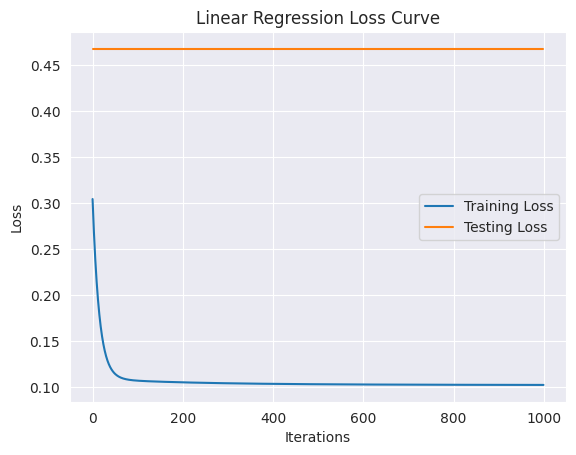

In [494]:
# Create loss curve
plt.plot(cost_history, label='Training Loss')  # Plot training loss

# Calculate test loss at each iteration (if desired)
test_loss_history = []
# Add a bias term to X_test (similar to what was done with X)
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]

# Calculate predictions and test loss using the final optimized theta
y_pred_test = X_test_with_bias @ theta  # Predictions on test data
test_loss = cost_function(X_test_with_bias, y_test, theta)  # Calculate test loss

# Append the test loss for each iteration (if desired)
test_loss_history = [test_loss] * iterations  # Repeat test loss for all iterations

plt.plot(test_loss_history, label='Testing Loss')  # Plot testing loss

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Linear Regression Loss Curve')
plt.legend()
plt.show()

Since this is a classification problem, which I understood after I started the project, while able to fit a linear Regression model and optimize it, it proved to be unsuitable. Even after encoding, the loss it still quite high. I then decided to instead use the knn classifier, better suited for this classification task

In [495]:
X2= df_clean.drop(columns= ['Target'],axis = 1)
y2= df_clean['Target']


# Random state for reapetability, test size of 30% as it is the optimum
# Stratify is used to ensure the test and train data have the same ratio

X_train, X_test, y_train, y_test = train_test_split(X2,y2,random_state=42,test_size= 0.3,stratify= y2)
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test = scaler.transform(X_test)


In [496]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the model using the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model using appropriate metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

# Print the evaluation metrics
print("KNN Accuracy:", accuracy)
print("KNN Precision:", precision)
print("KNN Recall:", recall)
print("KNN F1-score:", f1)
# Calculate RMSE
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

# Print the RMSE
print("KNN RMSE:", rmse_knn)

KNN Accuracy: 0.6545333333333333
KNN Precision: 0.7044602698650675
KNN Recall: 0.7875549968573224
KNN F1-score: 0.7436937382530419
KNN RMSE: 0.5877641250252236


Ranking the rmses for the different models, We note that the KNN displays the lowest RMSE. It is hence the best performing model for this task. Therefore Saving it.

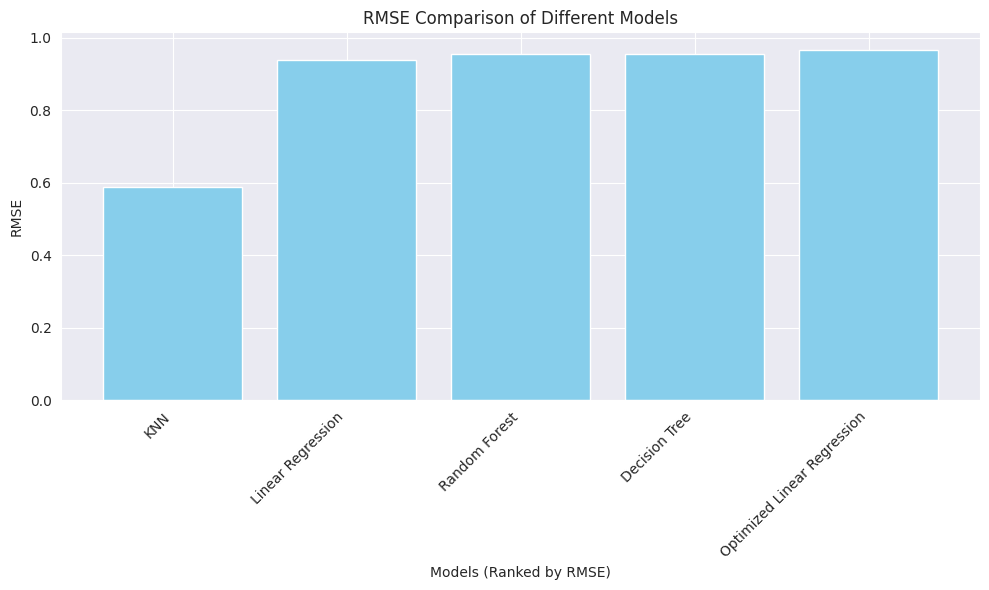

In [499]:
from csv import list_dialects
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated the RMSE values for each model:
# rmse_knn, rmse_lr_optimized, rmse_dt, rmse_lr, rmse_rf

# Create a dictionary to store model names and their RMSE values
rmse_data = {
    "KNN": rmse_knn,
    "Optimized Linear Regression": rmse_lr_optimized,
    "Decision Tree": rmse_dt,
    "Linear Regression": rmse_lr,
    "Random Forest": rmse_rf
}

# Sort the models based on RMSE values in ascending order
sorted_rmse_data = dict(sorted(rmse_data.items(), key=lambda item: item[1]))

# Extract model names and RMSE values for plotting
models = list(sorted_rmse_data.keys())
rmse_values = list(sorted_rmse_data.values())

# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, rmse_values, color='skyblue')  # Create bars

# Add labels and title
plt.xlabel("Models (Ranked by RMSE)")
plt.ylabel("RMSE")
plt.title("RMSE Comparison of Different Models")

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Display the histogram
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Saving the KNN

In [500]:
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']